In [184]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

1. Generate simulated values from the following distributions

(a) Exponential distribution

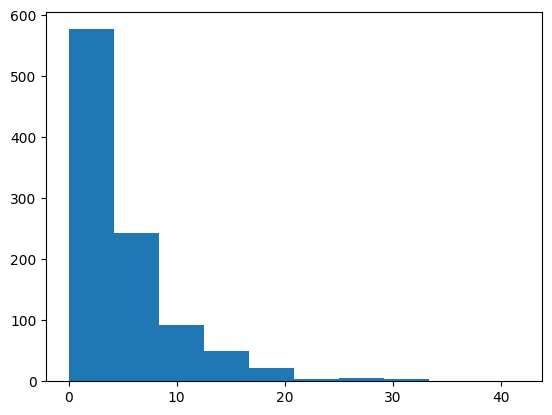

mean: 4.986473983006856, sd: 5.098241344207975


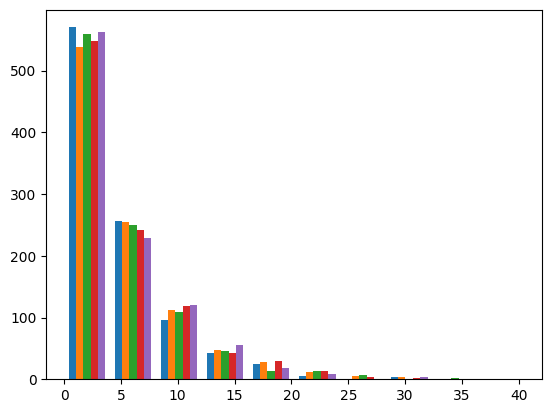

mean: 4.9833599009494165, sd: 4.966978820036533
1000 5
1.1320915478857451e-224
6.873154691479797e-259
3.131874904446113e-243
9.121978624099702e-252
3.7254644688364547e-256


In [174]:

u = np.random.uniform(size=1000)
u_exp = 5 * (- np.log(1 - u))

plt.hist(u_exp)
plt.show()
print ("mean: " + str(np.mean(u_exp)) + ", sd: " + str(np.std(u_exp)))

#experimental
exp1 = [np.random.exponential(5, 1000) for _ in range(5)]

plt.hist(exp1)
plt.show()
print ("mean: " + str(np.mean(exp1)) + ", sd: " + str(np.std(exp1)))

print(len(u_exp), len(exp1))
p_value=0
for el in exp1:
    chi2, p_value, dof, expected = st.chi2_contingency([u_exp, el])
    print(p_value)


By computing the p-values for the X^2-test between the exponentially distributed random variables generated from an unifiorm distribution against 5 randomly generated exponentially distributed samples with the same value of beta, we get that the p-values are all significantly smaller than the significance level of 0.05. Thus, the null hypothesis is rejected and we accept that the generated sample gives reasonable evidence to support that it follows an exponential distribution.

(b) Normal distribution (at least with standard Box-Mueller)

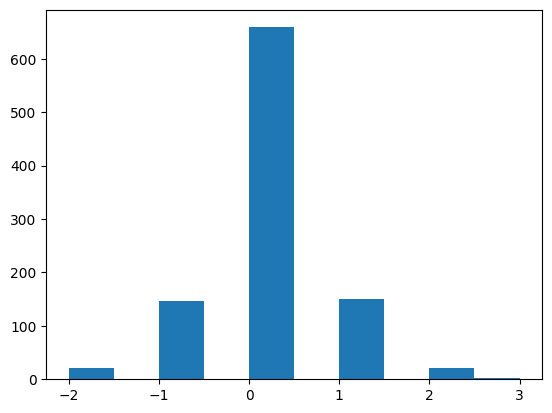

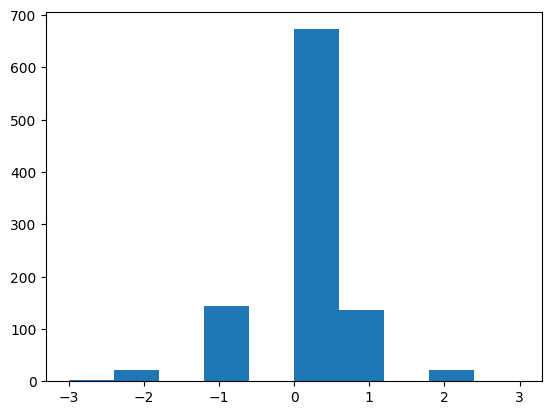

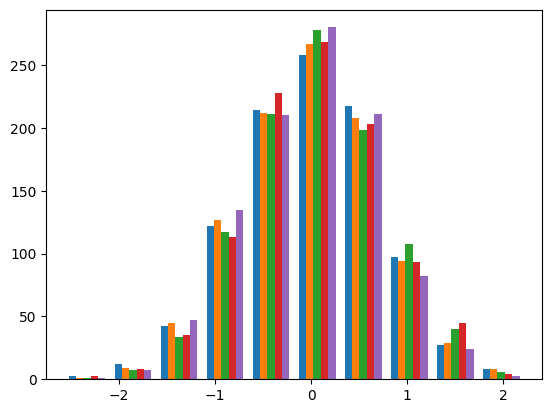

1000


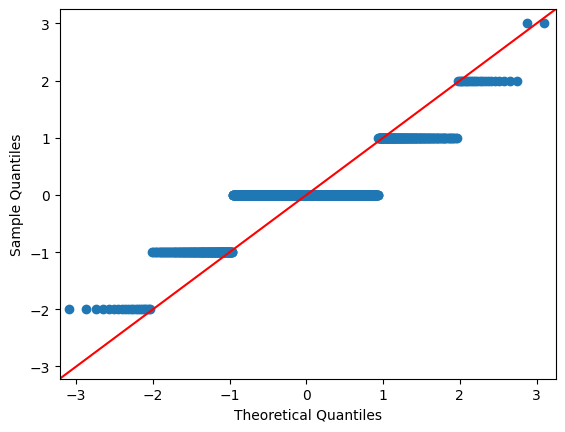

In [211]:
#box_muller_method():

s1 = np.array([0 for _ in range(1000)] )
s2 = np.array([0 for _ in range(1000)] )

for i in range(1000):
    u1 = random.uniform(0, 1)
    u2 = random.uniform(0, 1)
    R = -2 * math.log(u1)
    theta = 2 * math.pi * u2
    z1 = math.sqrt(R) * math.cos(theta)
    z2 = math.sqrt(R) * math.sin(theta)
    #print(z1)

    s1[i] = z1
    s2[i] = z2

plt.hist(s1)
plt.show()
plt.hist(s2)
plt.show()


#experimental
exp2 = [np.random.normal(np.mean(s1), np.std(s1), 1000) for _ in range(5)]
plt.hist(exp2)
plt.show()

# (z1 * std_dev) + mean, (z2 * std_dev) + mean
print(len(s1))
d = np.random.normal(0,1, 1000)
fig = sm.qqplot(s1, line='45')
plt.show()




(c) Pareto distribution, with β = 1 and experiment with
different values of k values: k = 2.05, k = 2.5, k = 3 and k = 4.

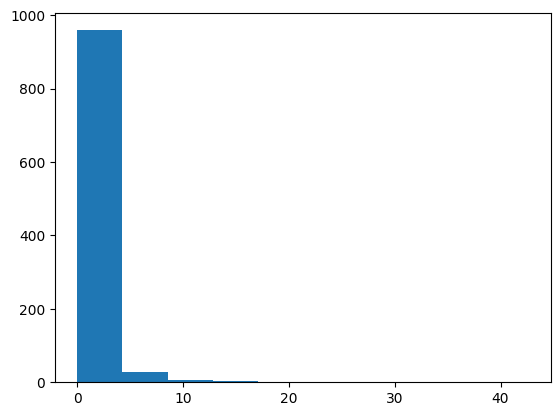

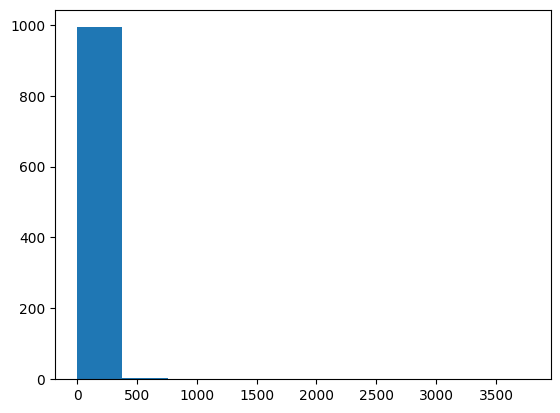

0.0


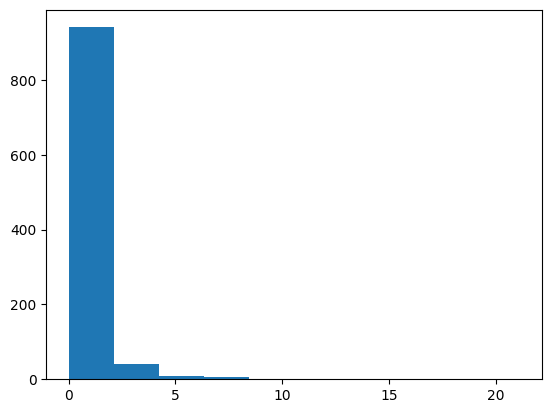

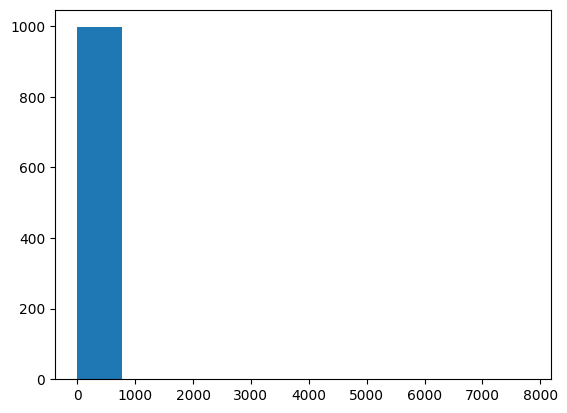

0.0


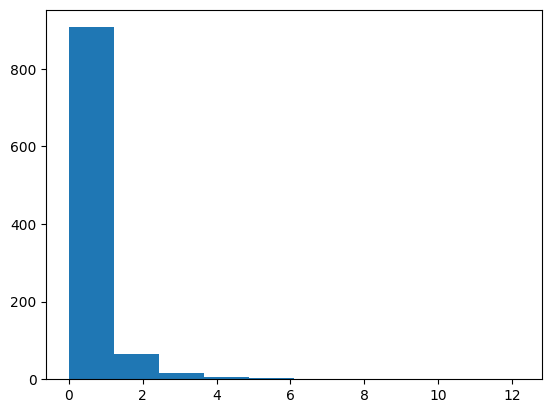

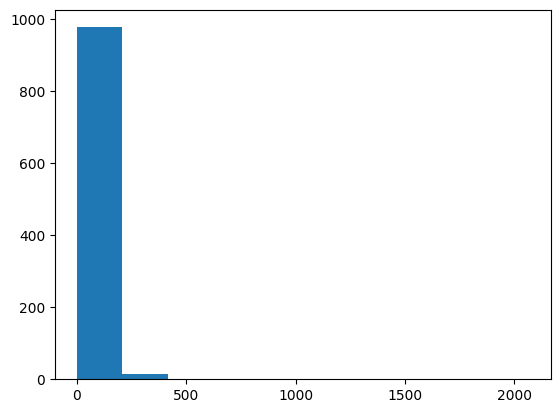

2.999792527978573e-300


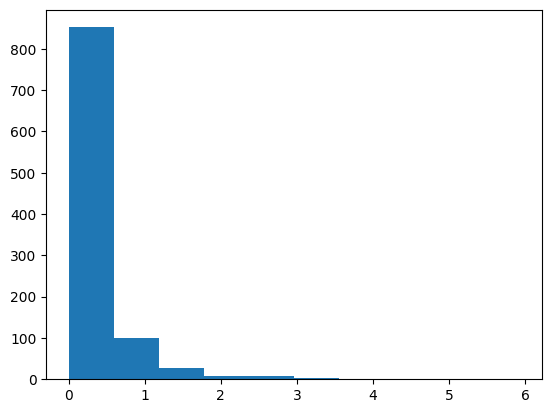

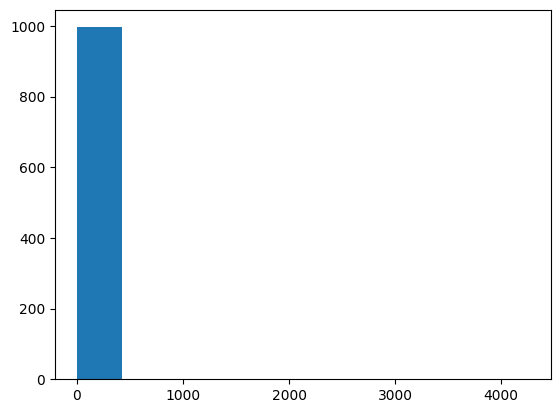

1.165043091261229e-109


In [207]:
beta = 1
k_values = [2.05, 2.5, 3, 4]

for k in k_values:
    pareto = []
    exp3 = []
    for e in u:
        pareto.append( beta*(e**(-1/k) - 1) )

    #experimental    
    exp3 = (np.random.pareto(beta, 1000) + 1) * k
    plt.hist(pareto)
    plt.show()
    plt.hist(exp3)
    plt.show()
    
    #p-value
    print("p-value: " + st.chi2_contingency([pareto, exp3])[1])


#experimental #experimental




2. For the Pareto distribution with support on []β, ∞[] compare
mean value and variance, with analytical results, which can be
calculated as E(X) = β k/(k-1) (for k > 1) and
Var(X) = β^2 k/((k-1)^2 (k-2) ) (for k > 2). Explain problems if any.

3. For the normal distribution generate 100 95% confidence
intervals for the mean and variance, each based on 10
observations. Discuss the results.

In [223]:
ci_mean = []
ci_std = []
p = 0

def confidence_interval_std(sample, confidence_level=0.95):
    n = len(sample)
    s2 = np.var(sample, ddof=1)
    alpha = 1 - confidence_level
    chi2_lower = st.chi2.ppf(alpha / 2, n - 1)
    chi2_upper = st.chi2.ppf(1 - alpha / 2, n - 1)
    ci_lower = s2 / chi2_upper
    ci_upper = s2 / chi2_lower
    return ci_lower, ci_upper

def confidence_interval_mean(sample, confidence_level=0.95):
    m = np.mean(sample)
    s =  np.std(sample)
    dof = len(sample)-1 
    n = len(sample)
    alpha = 1 - confidence_level

    t_crit = np.abs(st.t.ppf((alpha)/2,dof))

    ci_lower = m-s*t_crit/np.sqrt(n)
    ci_upper =  m+s*t_crit/np.sqrt(n)

    return ci_lower, ci_upper

for i in range(0, len(s1), 10):

    m = np.mean(s1[i:i + 9])
    s =  np.std(s1[i:i + 9])
    dof = len(s1[i:i + 9])-1 
    confidence = 0.95

    t_crit = np.abs(st.t.ppf((1-confidence)/2,dof))

    #conf_intervals.append((m-s*t_crit/np.sqrt(len(s1[i:i + 9])), m+s*t_crit/np.sqrt(len(s1[i:i + 9]))) )
    ci_mean.append(confidence_interval_mean(s1[i:i + 9]))
    ci_std.append(confidence_interval_std(s1[i:i + 9]))

    #a = st.t.interval(alpha=0.95, df=len(s1) - 1, loc=np.mean(s1[i:i + 9]), scale=st.sem(s1[i:i + 9]))
    #conf_intervals[p] 

ci_mean
ci_std



[(0.03485183512876896, 0.2803608252447512),
 (0.039604358100873815, 0.3185918468690354),
 (0.05703027566525829, 0.458772259491411),
 (0.028515137832629146, 0.2293861297457055),
 (0.04277270674894373, 0.3440791946185583),
 (0.025346789184559248, 0.2038987819961827),
 (0.0, 0.0),
 (0.014257568916314573, 0.11469306487285275),
 (0.025346789184559248, 0.2038987819961827),
 (0.02534678918455924, 0.20389878199618267),
 (0.028515137832629146, 0.2293861297457055),
 (0.014257568916314573, 0.11469306487285275),
 (0.025346789184559248, 0.2038987819961827),
 (0.020594266212454387, 0.16566776037189843),
 (0.0300993121566641, 0.2421298036204669),
 (0.0538619270171884, 0.43328491174188827),
 (0.00633669729613981, 0.050974695499045666),
 (0.014257568916314573, 0.11469306487285275),
 (0.014257568916314573, 0.11469306487285275),
 (0.011089220268244668, 0.08920571712332992),
 (0.014257568916314573, 0.11469306487285275),
 (0.014257568916314573, 0.11469306487285275),
 (0.020594266212454387, 0.16566776037189

4. Simulate from the Pareto distribution using composition.